# Notebook 3 - Simulated annealing for the TSP

CSI4106 Artificial Intelligence  
Fall 2021  
Version 1 (2020) prepared by Julian Templeton. Version 2 (2021) adapted by Caroline Barrière.

***INTRODUCTION***:

This homework will allow you to explore the *Simulated Annealing* search algorithm. It is a good example of a *random modification* algorithm, in which we start with a greedy solution, and then make changes and accept the modified solutions with different probabilities given their level of fitness to a cost function.

The application domain for experimenting with *Simulated Annealing* is the traveling salesman problem (TSP), which is a classical problem of scheduling, with optimization on the cost of travel.  In TSP, the traveler must visit all the cities in the smallest amount of time or in the shortest distance.  In our definition of the problem, distance will be the cost that we want to minimize.

The notebook will lead into the *Simulated Annealing* portion after exploring a *Greedy Search* and a *Random Step* approach as well.  Remember that in *random step*, we follow a greedy search, but sometimes (at some steps) we make a different choice.

***HOMEWORK***:  

Go through the notebook by running each cell, one at a time.  
Look for **(TO DO)** for the tasks that you need to perform. Do not edit the code outside of the questions which you are asked to answer unless specifically asked. Once you're done, write your name and student number at the bottom and submit it.  Don't forget to rename the notebook to *StudentNumber-LastName-Notebook3.ipynb*.

*The notebook will be marked on 25.  
Each **(TO DO)** has a number of points associated with it.*
***

**1. Let's start with a small set of cities.**

In [752]:
# let's define 5 cities with a label and a (x,y) coordinate
cities = {'A': (0,0), 'B': (1,1), 'C': (1,0), 'D': (1,-1), 'E': (-1,-1)}

Let's plot the nodes using the *showNodes* method below.  
The packages matplotlib, networkx, and numpy must be installed first.  
To do so, open a command prompt and type **pip install numpy** and **pip install networkx** (If you are using linux or potentially Mac, you may need to use **pip3** rather than **pip** depending on how you set it up). You should already have matplotlib, but if not use the pip command **pip install matplotlib**. After installing the packages, run the cell below. If it does not work, restart the Kernel and run through it again to be able to run the cell.

In [753]:
import matplotlib.pyplot as plt
import networkx as nx

# small method to show nodes
# provide defaults for figure size (size), as well as x and y axis
def showNodes(nodeDict, size= (6.5, 4), xLim=[-2,2], yLim=[-2,2]):
    fig = plt.figure(figsize=size)
    axg = fig.add_subplot(111)
    axg.set_xlim(xLim)
    axg.set_ylim(yLim)

    G=nx.Graph()
    for k in nodeDict.keys():
        G.add_node(k, coor=nodeDict.get(k))
    
    pos=nx.get_node_attributes(G,'coor')
    nx.draw(G, pos, with_labels = True)
    plt.axis('on')
    plt.show()

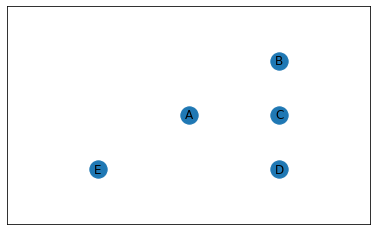

In [754]:
# show the cities on a map
showNodes(cities)

#### 2. Let's measure the distances between all cities.
First, we define a method to calculate the distance between two specific cities, and then a method to find the distances between all pairs of nodes.

In [755]:
import math

# returns the euclidian distance between two nodes
def dist(node1, node2):
    return round(math.sqrt(math.pow(node1[0] - node2[0], 2) + math.pow(node1[1] - node2[1], 2)), 3)

In [756]:
# Small test to see the distance
dist(cities.get('A'), cities.get('B'))

1.414

In [757]:
# building a dictionary of all pairs or distances
def distDict(nodes):
    distance = {}
    # go through all pairs of nodes
    for k in nodes.keys():
        for m in nodes.keys():
            distance[k,m] = dist(nodes.get(k), nodes.get(m))
    return distance

In [758]:
# showing the distances between the cities
distances = distDict(cities)
print(distances)

{('A', 'A'): 0.0, ('A', 'B'): 1.414, ('A', 'C'): 1.0, ('A', 'D'): 1.414, ('A', 'E'): 1.414, ('B', 'A'): 1.414, ('B', 'B'): 0.0, ('B', 'C'): 1.0, ('B', 'D'): 2.0, ('B', 'E'): 2.828, ('C', 'A'): 1.0, ('C', 'B'): 1.0, ('C', 'C'): 0.0, ('C', 'D'): 1.0, ('C', 'E'): 2.236, ('D', 'A'): 1.414, ('D', 'B'): 2.0, ('D', 'C'): 1.0, ('D', 'D'): 0.0, ('D', 'E'): 2.0, ('E', 'A'): 1.414, ('E', 'B'): 2.828, ('E', 'C'): 2.236, ('E', 'D'): 2.0, ('E', 'E'): 0.0}


Let's also add a method to find the closest city to another city. This method will be useful later.

In [759]:
# find the min distance from node1 to all other nodes.
# it receives the node1 label, the labels of other nodes to test,
# and the precalculated distances between all nodes
def closestNode(node1_label, otherNodes_Labels, distanceDict):
    # tricky syntax... it creates tuples where the distance is the first element of the tuple
    # and the position in the array is the second element of the tuple
    minDist = min( (distanceDict[node1_label,k], k) for k in otherNodes_Labels)
    # get the second element of the tuple which is the index found
    foundNode = minDist[1]
    return foundNode

In [760]:
# Testing the closest node
closestNode('B', ['C', 'D'], distances)

'C'

#### 3. Greedy solution first 
The first solution we explore is a Greedy solution.

In [761]:
# greedy solution
import random
def greedy_solution(nodes):
    # distance matrix
    allDist = distDict(nodes)
    # pick a first node at random among the set of keys (node names)
    cur_node = random.choice(list(nodes.keys()))
    # add that node to solution
    solution = [cur_node]
    # build a free list of nodes (not yet used) containing all nodes except the one just chosen 
    free_list = list(nodes.keys())
    free_list.remove(cur_node)
    
    # while there are still nodes to be attached
    while free_list:
        # find the closestNode
        found_node = closestNode(cur_node, free_list, allDist)
        cur_node = found_node
        free_list.remove(cur_node)
        solution.append(cur_node)

    return solution

In [762]:
# Test obtaining a greedy solution
gs1 = greedy_solution(cities)
print(gs1)

['B', 'C', 'A', 'D', 'E']


**(TO DO) Q1 - 2 marks**  
There are cases in TSP in which the start city is defined.  
(a) Define a new greedy solution method in which you include an additional parameter which is the name of the starting node. \
(b) Test your method with starting node 'B'.  Show the solution found.

In [763]:
# ANSWER - Q1 - Part 1
# Copy-paste from greedy_solution and make a small change
# greedy solution
import random
def greedy_solution_with_fixed_start(nodes, start):
    # distance matrix
    allDist = distDict(nodes)
    # assign start node
    cur_node = start
    # add that node to solution
    solution = [cur_node]
    # build a free list of nodes (not yet used) containing all nodes except the one just chosen 
    free_list = list(nodes.keys())
    free_list.remove(cur_node)
    
    # while there are still nodes to be attached
    while free_list:
        # find the closestNode
        found_node = closestNode(cur_node, free_list, allDist)
        cur_node = found_node
        free_list.remove(cur_node)
        solution.append(cur_node)

    return solution

In [764]:
# ANSWER - Q1 - Part 2
# Test your new method with starting node 'B'
gs2 = greedy_solution_with_fixed_start(cities, 'B')
print(gs2)

['B', 'C', 'A', 'D', 'E']


#### 4. Calculating the distance travelled, and showing a path.  


When we have a solution for the TSP, we want to know the total distance traveled with that solution.

**(TO DO) Q2 - 2 marks**  
Complete the method to find the total length of the path found.  

In [765]:
# ANSWER Q2 - Fill in the missing lines
def totalDist(path, distanceDict):
    total = 0
    for i in range(len(path) - 1):
        x = path[i]
        y = path[i+1]    
        total += distanceDict[x,y]         
    return round(total,3)

In [766]:
# Test the total distance method
print(gs1)
print(totalDist(gs1, distances))
print(gs2)
print(totalDist(gs2, distances))

['B', 'C', 'A', 'D', 'E']
5.414
['B', 'C', 'A', 'D', 'E']
5.414


Now, we would like to see the path found.  We slightly modify to showNodes method from before, to become showPath, wich is now a directed graph.  

In [767]:
# small method to show a path
# it receives an ordered list of nodes e.g. ['B','C','A', 'D', 'E']
# and a dictionary of all the nodes and their positions
def showPath(path, nodeDict, size= (6.5, 4), xLim=[-2,2], yLim=[-2,2]):
    fig = plt.figure(figsize=size)
    axg = fig.add_subplot(111)
    axg.set_xlim(xLim)
    axg.set_ylim(yLim)

    G=nx.DiGraph()
    for k in path:
        G.add_node(k, pos=nodeDict.get(k))
        
    for i in range(len(path) - 1):
        x = path[i]
        y = path[i + 1]
        G.add_edge(x,y)
        
    pos=nx.get_node_attributes(G,'pos')
    nx.draw(G, pos, with_labels = True, edge_color = ['b', 'r', 'c', 'y', 'g', 'm'], arrows=True)   
    # nx.draw(G, pos, with_labels = True)
    plt.axis('on')
    plt.show()

**(TO DO) Q3 - 2 marks**  
Show the path obtained with the greedy search (any start node) and the greedy search with 'A' as start node.  *ATTENTION: since the nodes B, C and D are aligned vertically, it is possible that a solution contains an arc from B to D or D to B, but it will be hidden behind node C.*

['D', 'C', 'A', 'B', 'E']


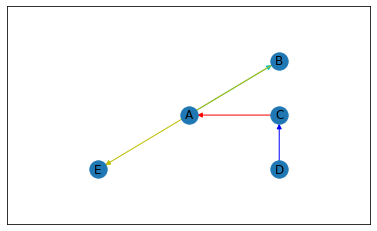

['A', 'C', 'B', 'D', 'E']


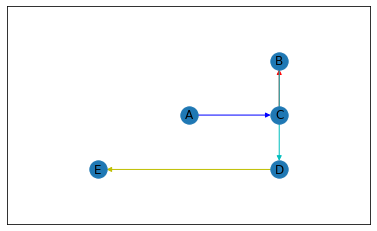

In [768]:
# ANSWER - Q3
# Show paths

# Testing to output the path chosen by the greedy solution
gs1 = greedy_solution(cities)
print(gs1)
showPath(gs1, cities)
# Testing to output the path chosen by the greedy solution with start 'A'
gs3 = greedy_solution_with_fixed_start(cities, 'A')
print(gs3)
showPath(gs3, cities)

 **(TO DO) Q4 - 4 marks**  
Add three more cities (wherever you want within the predefined -2 to +2 axis as long as no other node is already there).  Rerun the full sequence of tasks performed above on the larger set of cities that you will define below: \
(1) defining the graph \
(2) showing the points \
(3) building the distance dictionary \
(4) finding two unique greedy solutions (without fixing the start node) \
(5) showing the different paths found along with their total distances.

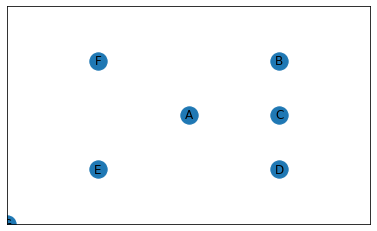

['G', 'E', 'A', 'C', 'B', 'D', 'F']


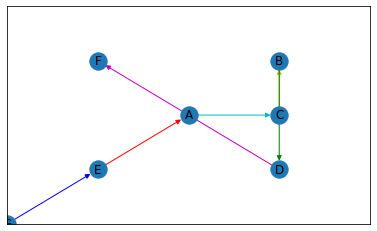

['F', 'A', 'C', 'B', 'D', 'E', 'G']


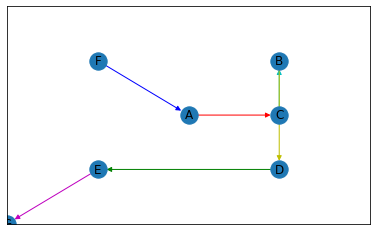

In [769]:
# ANSWER - Q4 
# (1) Defining a larger set of cities  (add two more)
moreCities = {'A': (0,0), 'B': (1,1), 'C': (1,0), 'D': (1,-1), 'E': (-1,-1), 'F': (-1,1), 'G': (-2,-2)}

# (2) Show the points ... 
showNodes(moreCities)

# (3) Build the distance dictionary
moreDistances = distDict(moreCities)

# (4) Find two unique greedy solutions (hint: generate one, and then generate a second one until different) 
gsA = greedy_solution(moreCities) # solution for list A
gsB = greedy_solution(moreCities) # first complete solution for list B
# Assume the lengths of the lists produced by each solution, gsA and gsB, are equal:
# Compare the list generated by each solution with a loop
# As soon as there is a node from list gsA that does not match the one in list gsB, the solutions are unique, break out of the loop
# If the loop reaches the end of the list, solutions are not unique, reset the index and call greedy_solution again for gsB
# Repeat previous steps until a unique solution is found for list B
i = 0
while i < len(gsA):
    if gsA[i] != gsB[i]:
        break
    if i == len(gsA)-1:
        i = -1
        gsB = greedy_solution(moreCities)

    i+=1

    
# (5) Show the two unique paths found above along with their total distances
print(gsA)
showPath(gsA, moreCities)
print(gsB)
showPath(gsB, moreCities)

**5. Random Step Algorithm**

For our Random Step algorithm, we will first define a new function called kClosestNodes that will return the k-closest nodes to a given node.  This will be useful for taking a step different from the best one, but still not totally random to any node.

In [770]:
# find the min distance from node1 to all other nodes.
# it receives the node1 label, the labels of other nodes to test,
# the precalculated distances between all nodes, and k for how many to return
# The function then outputs a list of the k-closest nodes, where the
# first is the closest and the kth is the kth-closest
def kClosestNodes(node1_label, otherNodes_Labels, distanceDict, k):
    kClosest = []
    # Create a sorted distance list based on the values from the distance dictionary
    # This has the form [((node_1, node_2),value_1), ..., ((node_n, node_n), value_n)]
    sortedDistances = sorted(distanceDict.items(), key=lambda keyPair: keyPair[1])
    # Iterate through the sorted distance list to find our k min distances
    # from node1_label
    for key, value in sortedDistances:
        if (k > 0 and key[0] == node1_label and key[1] in otherNodes_Labels):
            k -= 1
            kClosest.append(key[1])
    return kClosest

In [771]:
# Example usage
# View the distance dictionary to verify correctness when finding the closest nodes
# to node B in cities
print(distances)
# Find the two closest nodes to the node B in cities (using its distance dictionary)
kClosestNodes('B', ['A', 'C', 'D', 'E'], distances, 2)

{('A', 'A'): 0.0, ('A', 'B'): 1.414, ('A', 'C'): 1.0, ('A', 'D'): 1.414, ('A', 'E'): 1.414, ('B', 'A'): 1.414, ('B', 'B'): 0.0, ('B', 'C'): 1.0, ('B', 'D'): 2.0, ('B', 'E'): 2.828, ('C', 'A'): 1.0, ('C', 'B'): 1.0, ('C', 'C'): 0.0, ('C', 'D'): 1.0, ('C', 'E'): 2.236, ('D', 'A'): 1.414, ('D', 'B'): 2.0, ('D', 'C'): 1.0, ('D', 'D'): 0.0, ('D', 'E'): 2.0, ('E', 'A'): 1.414, ('E', 'B'): 2.828, ('E', 'C'): 2.236, ('E', 'D'): 2.0, ('E', 'E'): 0.0}


['C', 'A']

**(TO DO) Q5 - 3 marks**  
Below is defined the random step algorithm.  Fill in the missing parts. The current implementation of *Random Step* assumes that at every step, there is 50% chance of following the greedy search, and 50% chance of taking a different action among the k closest nodes.  

In [772]:
# ANSWER - Q5 
import random
import numpy as np

# k represents the number of closest nodes to be returned from the
# function kClosestNodes
def random_step(nodes, k):
    # distance matrix
    allDist = distDict(nodes)
    # pick a first node at random among the set of keys (node names)
    cur_node = random.choice(list(nodes.keys()))
    # add that node to solution
    solution = [cur_node]
    # build a free list of nodes (not yet used) containing all nodes except the one just chosen 
    free_list = list(nodes.keys())
    free_list.remove(cur_node)
    
    # while there are still nodes to be attached
    while len(free_list) != 0:
        
        # if greedy_or_not is 0, chose among the k closest nodes, otherwise, do greedy meaning reduce k to 1
        greedy_or_not = random.randint(0,1)
        if (greedy_or_not == 0):
            nbPoss = k
        else:
            nbPoss = 1

        # define the possible nodes for that step    
        possibilities = kClosestNodes(cur_node, free_list, allDist, nbPoss)
        print(possibilities)
        
        # randomly choose one node among the possibilities
        found_node = random.choice(possibilities)
        
        # Add the found node on the solution and remove from free list
        cur_node = found_node
        free_list.remove(cur_node)
        solution.append(cur_node)
        
    return solution

**(TO DO) Q6 - 5 marks**  
Perform some tests and evaluation. \
(a) Run the greedy search 3 times.  \
(b) Run the random step 3 times with k = 2.  \
(c) Run the random step 3 times with k = 3.  
For each test, show the path found and its length.  \
Then, at the end, show average results for each of (a, b, c). \
Finally, discuss the results obtained.  Is the random step better? Does k-2 versus k=3 make a difference?

Path: ['G', 'E', 'A', 'C', 'B', 'D', 'F'], Path Length: 9.656


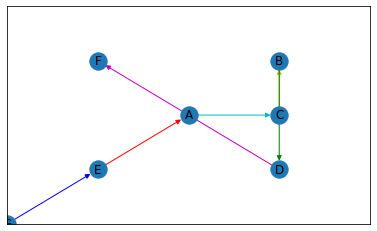

Path: ['A', 'C', 'B', 'D', 'E', 'G', 'F'], Path Length: 10.576


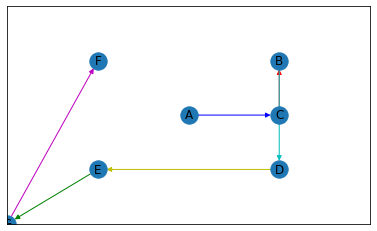

Path: ['A', 'C', 'B', 'D', 'E', 'G', 'F'], Path Length: 10.576


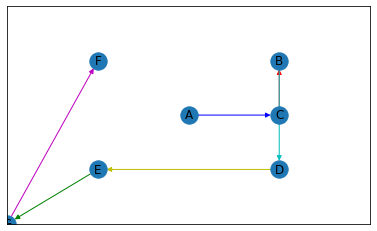

['C', 'A']
['A']
['B', 'E']
['G', 'F']
['F', 'B']
['F']
Path: ['D', 'C', 'A', 'E', 'G', 'B', 'F'], Path Length: 11.071


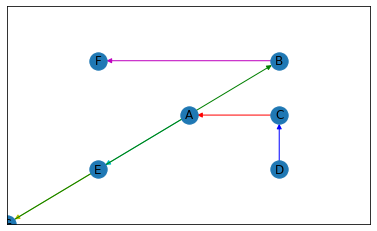

['A']
['C', 'B']
['C', 'D']
['D']
['F']
['G']
Path: ['E', 'A', 'B', 'C', 'D', 'F', 'G'], Path Length: 10.818


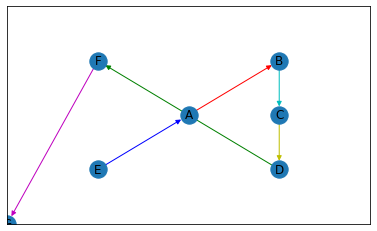

['C']
['A', 'B']
['A']
['E', 'F']
['E']
['G']
Path: ['D', 'C', 'B', 'A', 'F', 'E', 'G'], Path Length: 8.242


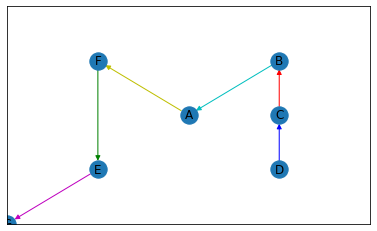

['A', 'B', 'E']
['A']
['C', 'B', 'D']
['B', 'D', 'G']
['D', 'B']
['D']
Path: ['F', 'E', 'A', 'C', 'G', 'B', 'D'], Path Length: 14.263


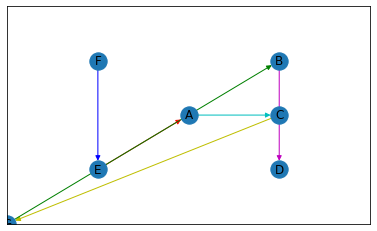

['C', 'A', 'B']
['C']
['B']
['F', 'E', 'G']
['E']
['G']
Path: ['D', 'A', 'C', 'B', 'F', 'E', 'G'], Path Length: 8.828


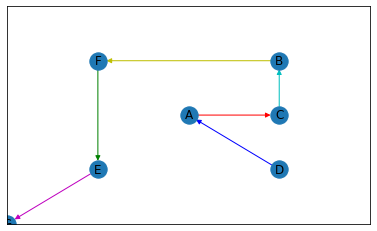

['E', 'A', 'D']
['C', 'B', 'D']
['C', 'B', 'E']
['B']
['F']
['E']
Path: ['G', 'A', 'D', 'C', 'B', 'F', 'E'], Path Length: 10.242


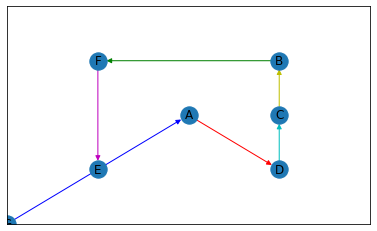


(a) Average results for greedy search is: 10.269
(b) Average results for Random Step where k=2 is: 10.044
(c) Average results for Random Step where k=3 is: 11.111


In [776]:
# ANSWER Q6 - Coding part
# Perform tests
# (a) Run the greedy search 3 times
total_distances_gs = 0
for i in range(3):
    gs_sol = greedy_solution(moreCities)
    gs_sol_td = totalDist(gs_sol, moreDistances)
    total_distances_gs += gs_sol_td
    print("Path: {}, Path Length: {}".format(gs_sol, gs_sol_td))
    showPath(gs_sol, moreCities)
avg = round(total_distances_gs/3, 3)


# (b) Run the random step 3 times with k = 2
k2 = 2
total_distances_rs_k2 = 0
for i in range(3):
    rs_k2_sol = random_step(moreCities, k2)
    rs_k2_sol_td = totalDist(rs_k2_sol, moreDistances)
    total_distances_rs_k2 += rs_k2_sol_td
    print("Path: {}, Path Length: {}".format(rs_k2_sol, rs_k2_sol_td))
    showPath(rs_k2_sol, moreCities)
avgk2 = round(total_distances_rs_k2/3, 3)



# (c) Run the random step 3 times with k = 3.
k3 = 3
total_distances_rs_k3 = 0
for i in range(3):
    rs_k3_sol = random_step(moreCities, k3)
    rs_k3_sol_td = totalDist(rs_k3_sol, moreDistances)
    total_distances_rs_k3 += rs_k3_sol_td
    print("Path: {}, Path Length: {}".format(rs_k3_sol, rs_k3_sol_td))
    showPath(rs_k3_sol, moreCities)
avgk3 = round(total_distances_rs_k3/3, 3)

print("\n(a) Average results for greedy search is: {}".format(avg))
print("(b) Average results for Random Step where k={} is: {}".format(k2, avgk2))
print("(c) Average results for Random Step where k={} is: {}".format(k3, avgk3))

Answer - Q6 - Discussion part

After running the tests a few times, the results obtained do not seem to indicate much of a difference between the greedy search and the random step. Furthermore, there does not seem to be much of a difference either between running random step with k=2 and k=3. Perhaps running each algorithm 3 times each was not enough to adequately outline their differences. 

**6. Defining the process of simulated annealing**  
We now look at a random modification algorithm.  More specifically, we look at *Simulated Annealing*.
The class below defines the simulated annealing process.  This class is an adaptation of the class anneal.py found in the python code provided in this github https://github.com/chncyhn/simulated-annealing-tsp. You are not asked to changed this class, just go through it and try to understand it so as to get a better understanding of the *simulated annealing* algorithm.

In [724]:
# NO MODIFICATION REQUIRED HERE
# class to perform a simulated annealing
# must start with a set of nodes, all other parameters have defaults
class SimAnneal(object):
    def __init__(self, nodes, randomStep, k=4, T=-1, alpha=-1, stopping_T=-1, stopping_iter=-1):
        # set of nodes
        self.nodes = nodes
        # number of nodes
        self.N = len(nodes)
        # set the temperature T to sqrt(N) if not specified
        self.T = math.sqrt(self.N) if T == -1 else T
        # set alpha (rate at which the temperature is decreased)
        self.alpha = 0.995 if alpha == -1 else alpha
        # set stopping temprature
        self.stopping_temperature = 0.00000001 if stopping_T == -1 else stopping_T
        # set stopping iteration
        self.stopping_iter = 100000 if stopping_iter == -1 else stopping_iter
        # start at iteration 1
        self.iteration = 1

        # calculate the distances
        self.allDist = distDict(nodes)
        
        # start with greedy solution if randomizedGreedy is false,
        #  start with the randomized greedy solution if randomizedGreedy is true
        if (randomStep):
            self.cur_solution = random_step(nodes, k)
            self.improvementMessage = 'Improvement over random step solution: '
        else:
            self.cur_solution = greedy_solution(nodes)
            self.improvementMessage = 'Improvement over greedy solution: '
        
        # so far, the best solution is the one we have
        self.best_solution = list(self.cur_solution)

        # calculate fitness of the current solution
        self.cur_fitness = self.fitness(self.cur_solution)
        # initial fitness for initial solution
        self.initial_fitness = self.cur_fitness
        # best fitness so far
        self.best_fitness = self.cur_fitness
        # build the fitness list as we explore solutions
        self.fitness_list = [self.cur_fitness]


    def fitness(self, sol):
        """ Objective value of a solution """
        return totalDist(sol, self.allDist)

    # acceptance propability
    def p_accept(self, candidate_fitness):
        """
        Probability of accepting if the candidate is worse than current
        Depends on the current temperature and difference between candidate and current
        """
        return math.exp(-abs(candidate_fitness - self.cur_fitness) / self.T)

    def accept(self, candidate):
        """
        Accept with probability 1 if candidate is better than current
        Accept with probabilty p_accept(..) if candidate is worse
        """
        candidate_fitness = self.fitness(candidate)
        # test if fitness is smaller then the current one
        if candidate_fitness < self.cur_fitness:
            self.cur_fitness = candidate_fitness
            self.cur_solution = candidate
            # test if fitness is better than best so far, keep it as best if so
            if candidate_fitness < self.best_fitness:
                self.best_fitness = candidate_fitness
                self.best_solution = candidate

        # if solution is worst than the current one, there is still a possibility to pursue it
        else:
            if random.random() < self.p_accept(candidate_fitness):
                self.cur_fitness = candidate_fitness
                self.cur_solution = candidate

    def anneal(self):
        """
        Execute simulated annealing algorithm
        """
        # go through the temperature schedule
        print(self.T)
        print(self.stopping_temperature)
        while (self.T >= self.stopping_temperature) and (self.iteration < self.stopping_iter):
            # explore current solution
            candidate = list(self.cur_solution)
            # modify the solution to switch two cities
            # first chosen city between [2,N-1] - not changing the first city
            l = random.randint(2, self.N - 1)
            # second city between [0,N-1] Not sure why ??
            i = random.randint(0, self.N - l)
            # the chosen nodes are switch
            candidate[i:(i + l)] = reversed(candidate[i:(i + l)])
            # perform acceptance test 
            self.accept(candidate)
            # multiply the temperature by alpha (this will reduce it)
            self.T *= self.alpha
            self.iteration += 1
            
            # add current fitness to list (to be able to display)
            self.fitness_list.append(self.cur_fitness)

        print('Best fitness obtained: ', self.best_fitness)
        print(self.improvementMessage,
              round((self.initial_fitness - self.best_fitness) / (self.initial_fitness), 4))

        return self.best_solution
    
    def plot_learning(self):
        """
        Plot the fitness through iterations
        """
        plt.plot([i for i in range(len(self.fitness_list))], self.fitness_list)
        plt.ylabel('Fitness')
        plt.xlabel('Iteration')
        plt.show()


#### 7. Refining a solution through simulated annealing.

Before doing modification, in a *random modification* algorithm such as simulated annealing, we must have a starting solution.  Such starting solution can be provided by a greedy algorithm, or if we have something else, like the random step algorithm we worked on in the previous sections, we can use that as well as starting point.

**(TO DO) Q7 - 2 marks**  
Put comments in the code below explaining what it does.  In your comments, explain what the different parameter settings are, when calling SimAnneal. Also run it a few times.  It will show you how there can be improvement (or not) from the greedy solution or the random step solution to the annealed one.

Solution ['B', 'C', 'A', 'D', 'E', 'G', 'F'] takes a total of 9.99


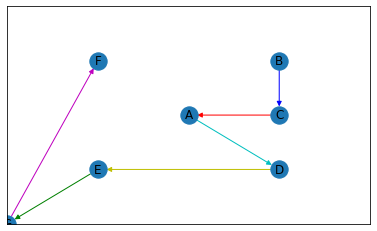

2.6457513110645907
1e-08
Best fitness obtained:  8.242
Improvement over greedy solution:  0.1464


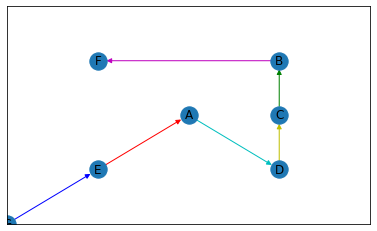

['A', 'B', 'D', 'E']
['A', 'G', 'D', 'F']
['A']
['B']
['D', 'G']
['G']
Solution ['C', 'E', 'F', 'A', 'B', 'D', 'G'] takes a total of 12.226


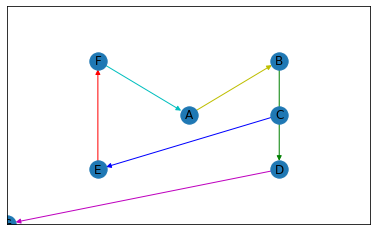

['E']
['A']
['C', 'B', 'D', 'F']
['C']
['D', 'F']
['D']
2.6457513110645907
1e-08
Best fitness obtained:  8.242
Improvement over random step solution:  0.2003


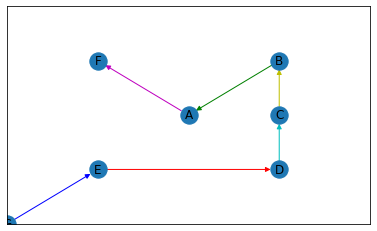

In [725]:
# ANSWER - Q7
# Include comments in the code

# greedy_solution accepts a set of cities as a parametre
# greedy_solution will generate a solution with greedy search for the set of cities
firstSol = greedy_solution(moreCities)
distances = distDict(moreCities)
print('Solution {} takes a total of {}'.format(firstSol,totalDist(firstSol, distances)))
showPath(firstSol, moreCities)

# SimAnneal accepts a set of cities as a parametre and will generate a solution for this set.
# randomStep parametre for the SimAnneal class allows the caller to indicate if a random step will occur. 
# Setting randomStep parametre to False means greedy_solution will be used by the anneal method, and no random step will occur
sa = SimAnneal(moreCities, False)
betterSol = sa.anneal()
showPath(betterSol, moreCities)

# random_step accepts a set of cities as a parametre to generate a solution using a random step algorithm
# random_step also accepts a parametre k:
#    if a random step occurs for a city, that city will have a list of size <k closest cities from it
#       then a city will be chosen at random from this list and added to the solution
#    else if no random step occurs, k will be set to 1 and a city will be chosen with a solution similar to a greedy search
secondSol = random_step(moreCities, 4)
print('Solution {} takes a total of {}'.format(secondSol,totalDist(secondSol, distances)))
showPath(secondSol, moreCities)

# SimAnneal accepts a set of cities as a parametre and will generate a solution for this set
# randomStep parametre for the SimAnneal class allows the caller to indicate if a random step will occur. 
# Setting randomStep parametre to True means a random step algorithm will be used by the anneal method
# The parametre k indicates the max size of a list of closest cities generated for a city
# Setting k to 4 means a list of size less than or equal to 4 will be generated to choose from during the random step
sa2 = SimAnneal(moreCities, True, 4)
betterSol2 = sa2.anneal()
showPath(betterSol2, moreCities)

**8. Moving toward a larger example**  
There are a set of coordinates defined in the file *coord.txt* (available in the Jupyter Notebooks module in Brightspace). This data file is also from the github https://github.com/chncyhn/simulated-annealing-tsp.  It contains a larger example with 45 cities, to test.  Here is the beginning of the file:

1 0 0  
2 3 5  
3 2.5 9  
4 48 16  
5 48 17  
6 69 16  
...

Make sure to put the file *coord.txt* in the same repertory as your notebook or modify the path below when opening the file to read.  We will assume the first number is the label, and the other two numbers are the coordinates.

In [726]:
# reading the coordinates
manyCities = {}
with open('C:/Users/xiong/OneDrive/Desktop/2021 Fall/CSI 4106/A3/coord.txt','r') as f:
    i = 0
    for line in f.readlines():
        line = [float(x.replace('\n','')) for x in line.split(' ')]
        label = str(int(line[0]))
        manyCities[label] = (line[1], line[2])
        i += 1

Show the nodes from that larger set of cities.

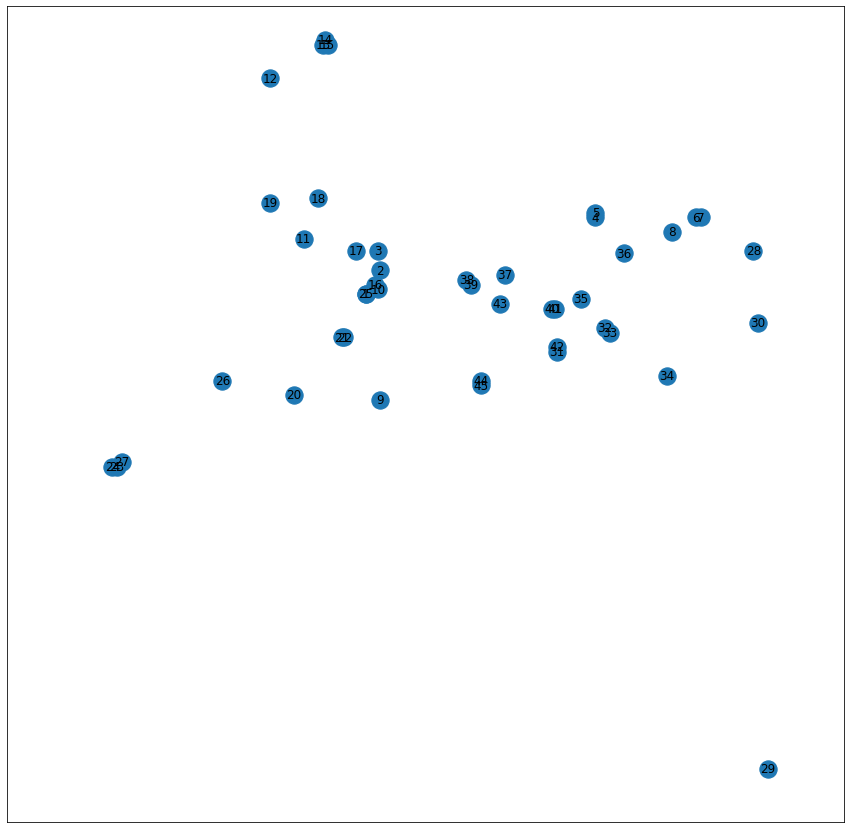

In [727]:
showNodes(manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])

Testing the annealing process with the larger example. The steps are the same as the ones you had to comment in Question 4. Look at the additional step *plot_learning*, it shows the value of the fitness function as the annealing process occurs.  Run it multiple times, it is a probabilistic approach, so the result might be slightly different each time.

Solution ['14', '13', '15', '12', '19', '18', '11', '17', '3', '2', '16', '10', '25', '1', '22', '21', '9', '20', '26', '27', '23', '24', '45', '44', '43', '37', '39', '38', '40', '41', '35', '32', '33', '42', '31', '34', '30', '28', '7', '6', '8', '36', '4', '5', '29'] takes a total of 557.946


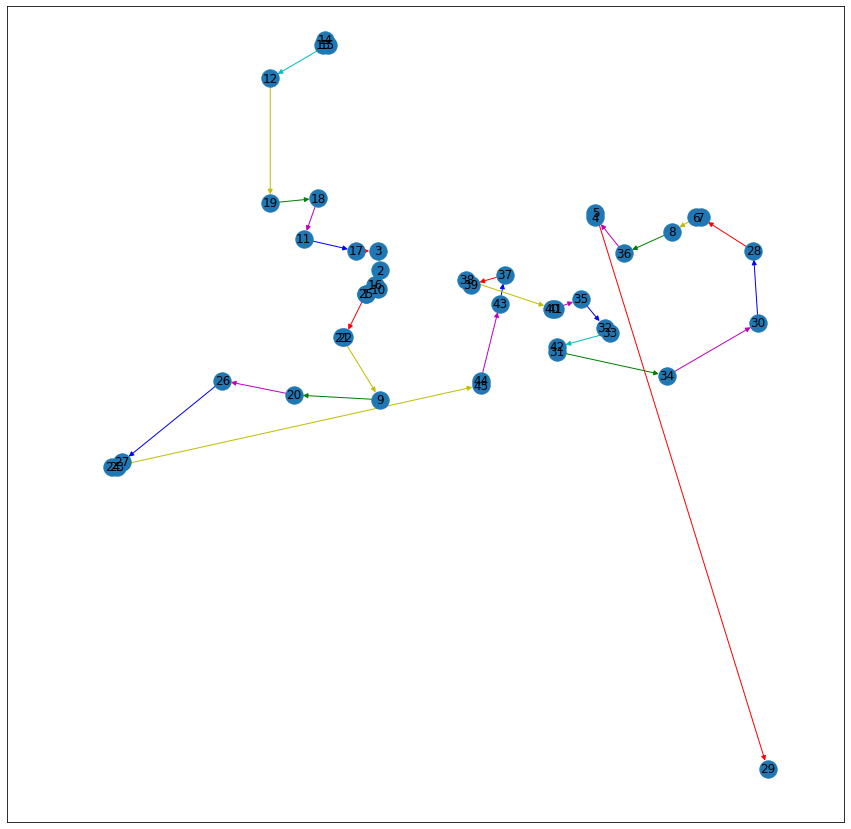

6.708203932499369
1e-08
Best fitness obtained:  507.216
Improvement over greedy solution:  0.1577


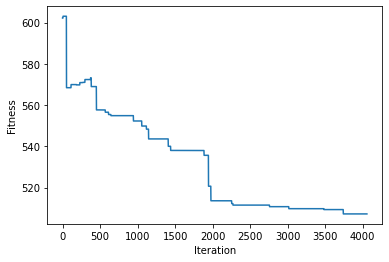

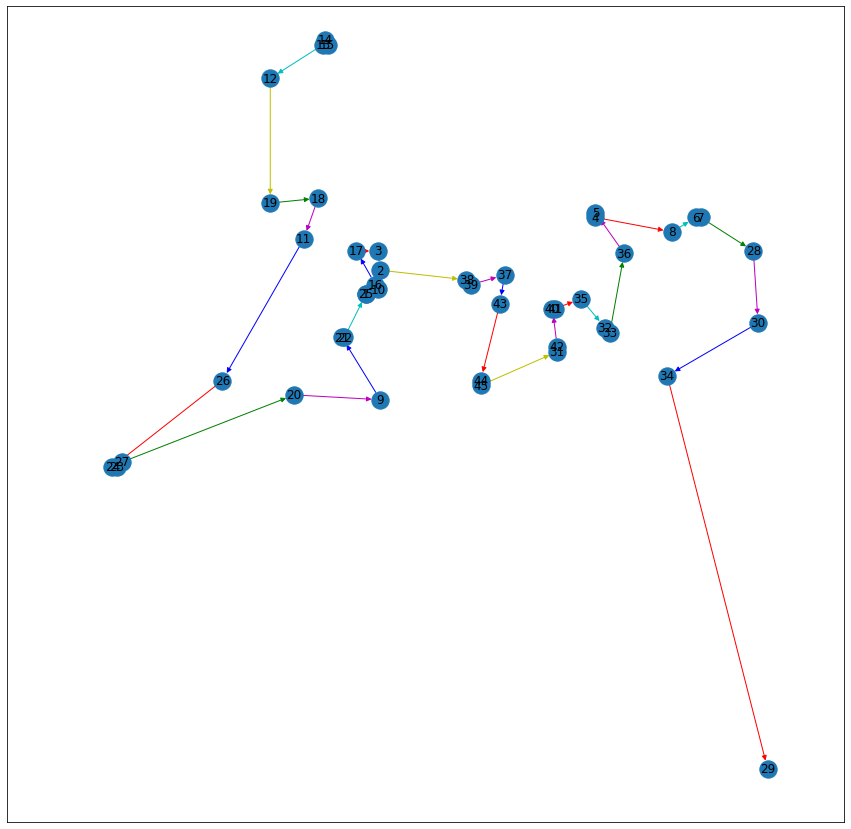

['44']
['43', '31', '42']
['31']
['41', '40', '32']
['33']
['35']
['41']
['40']
['43', '37', '39']
['37', '39', '38']
['39', '37', '2']
['37', '2', '10']
['4', '5', '36']
['4', '5', '8']
['5']
['8', '6', '7']
['7', '8', '28']
['7']
['8', '30', '34']
['30']
['34', '2', '10']
['16', '25', '1']
['25']
['16']
['2', '3', '17']
['3', '17', '22']
['3', '11', '18']
['11', '19', '3']
['11', '22', '21']
['19', '21', '22']
['22', '9', '20']
['26']
['27', '22', '23']
['24']
['27', '22', '9']
['22']
['9']
['19', '34', '12']
['13', '15', '14']
['15', '14', '19']
['15', '14', '34']
['29']
['15']
['14']
Solution ['45', '44', '42', '31', '32', '33', '35', '41', '40', '43', '38', '39', '37', '36', '4', '5', '6', '28', '7', '8', '30', '10', '1', '25', '16', '2', '17', '18', '3', '11', '21', '20', '26', '23', '24', '27', '22', '9', '12', '13', '19', '34', '29', '15', '14'] takes a total of 958.244


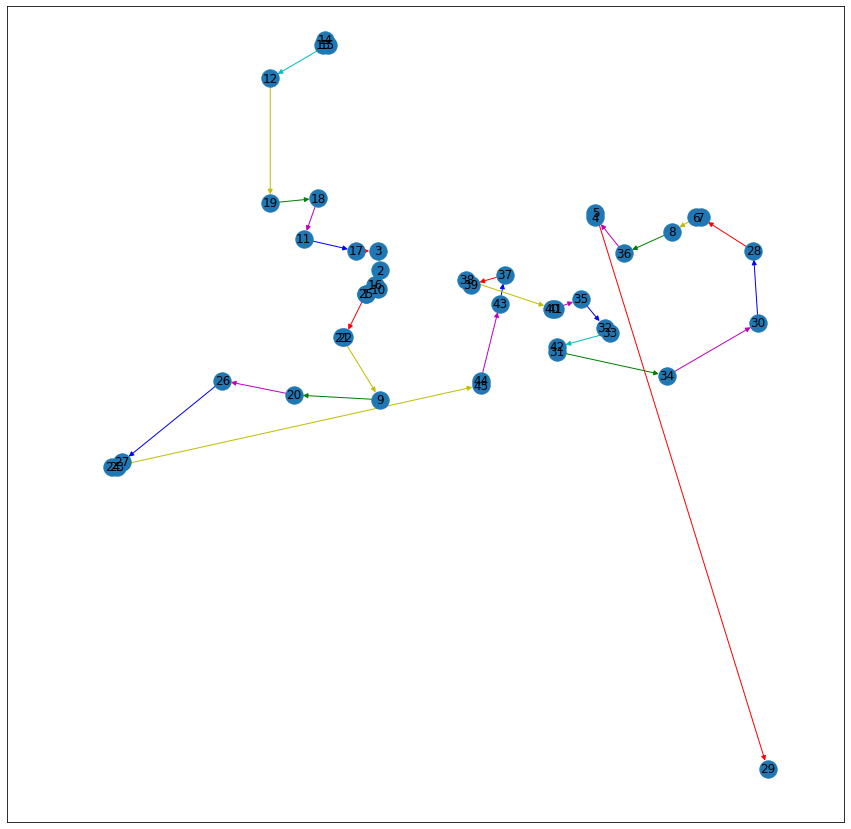

['20']
['21', '22', '9', '1']
['25']
['10', '16', '2', '17']
['10', '2', '3', '17']
['2', '3', '17', '22']
['3']
['2', '11', '18', '22']
['18']
['19', '2', '12', '21']
['13', '15', '14', '19']
['15', '14', '19', '2']
['2', '21', '22', '15']
['22']
['21', '9', '38', '39']
['38', '43', '37', '40']
['37', '38', '40', '41']
['37', '40', '41', '44']
['45', '31', '42', '40']
['42', '41', '40', '32']
['40', '35', '42', '32']
['33']
['35']
['40']
['42', '37', '36', '4']
['4', '5', '8', '6']
['6', '7', '4', '5']
['5', '6', '7', '37']
['7', '28', '5', '30']
['7']
['28']
['30']
['34']
['42']
['45', '37', '9', '21']
['45']
['9', '21', '27', '15']
['21', '27', '23', '24']
['27', '23', '24', '15']
['14', '27', '23', '24']
['24', '27', '14', '29']
['27']
['14', '29']
['14']
6.708203932499369
1e-08
Best fitness obtained:  523.93
Improvement over random step solution:  0.512


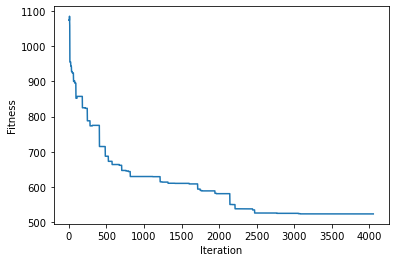

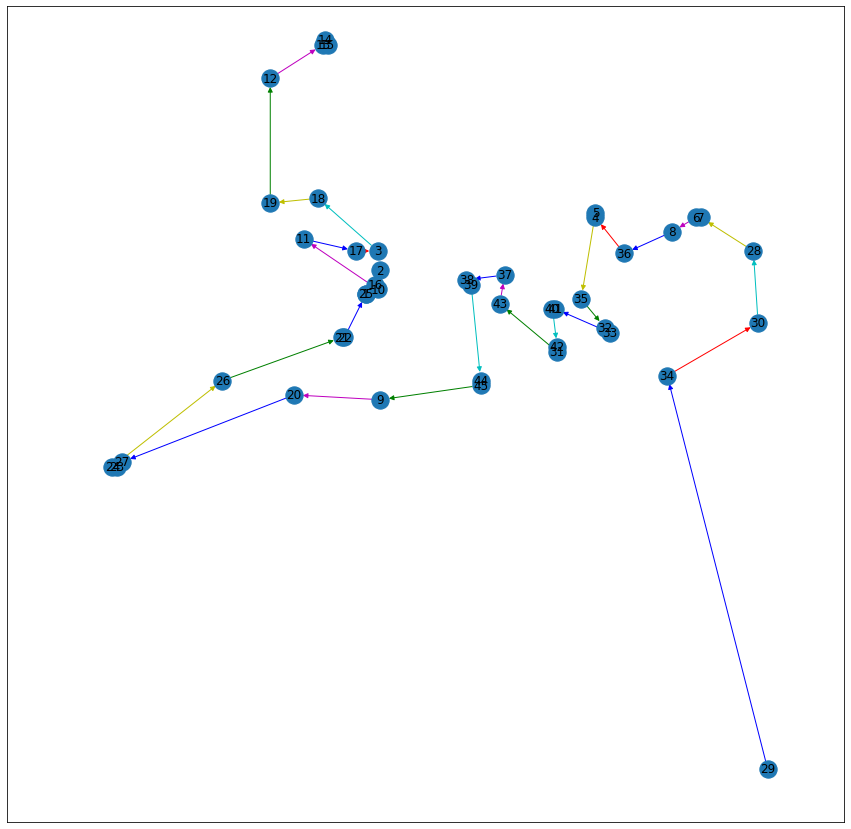

In [728]:
firstSol = greedy_solution(manyCities)
distances = distDict(manyCities)
print('Solution {} takes a total of {}'.format(firstSol,totalDist(firstSol, distances)))
showPath(firstSol, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])

sa = SimAnneal(manyCities, False)
betterSol = sa.anneal()
sa.plot_learning()
showPath(betterSol, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])

secondSol = random_step(manyCities, 3)
print('Solution {} takes a total of {}'.format(secondSol,totalDist(secondSol, distances)))
showPath(firstSol, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])

sa2 = SimAnneal(manyCities, True, 4)
betterSol2 = sa2.anneal()
sa2.plot_learning()
showPath(betterSol2, manyCities, size=(15,15), xLim=[-75,100], yLim=[-110,60])

**(TO DO) Q8 - 5 marks**   
As we've seen in the video lectures, and performed in question 6, evaluation of algorithms which include a random component should be performed by averaging a series of runs.  Define and perform some tests in which you will compare, on the large example (manyCities) the three algorithms explored in this notebook: greedy search, random step, simulated annealing.  For simulated annealing, test at least 2 configurations (which you saw as you commented the code in Q7).  Following your tests, discuss the results.

In [783]:
# ANSWER Q8 - Coding
# Distance Dictionary for manyCities
manyDistances = distDict(manyCities)

# Greedy tests
num_tests_g = 8
td_greedy = 0
for i in range(num_tests_g):
    greedy_sol = greedy_solution(manyCities)
    td = totalDist(greedy_sol, manyDistances)
    td_greedy += td
average_g = round(td_greedy/num_tests_g, 3)


# Random Step tests
num_tests_rs = 10
k = 2
td_rStep = 0
for i in range(num_tests_rs):
    rs_sol = random_step(manyCities, k)
    td = totalDist(rs_sol, manyDistances)
    td_rStep += td
average_rs = round(td_rStep/num_tests_rs, 3)

num_tests_rs2 = 10
k8 = 8
td_rStep2 = 0
for i in range(num_tests_rs2):
    rs_sol = random_step(manyCities, k8)
    td = totalDist(rs_sol, manyDistances)
    td_rStep2 += td
average_rs2 = round(td_rStep2/num_tests_rs2, 3)


# Simulated Annealing (configuration 1 tests)
num_tests_sa_c1 = 3
td_sa_c1 = 0
for i in range(num_tests_sa_c1):
    sa_c1 = SimAnneal(manyCities, True, 4)
    sol_c1 = sa_c1.anneal()
    td_sa_c1 += totalDist(sol_c1, manyDistances)

average_sa_c1 = round(td_sa_c1/num_tests_sa_c1, 3)


# Simulated Annealing (configuration 2 tests)
num_tests_sa_c2 = 4
td_sa_c2 = 0
for i in range(num_tests_sa_c2):
    sa_c2 = SimAnneal(manyCities, True, 9)
    sol_c2 = sa_c2.anneal()
    td_sa_c2 += totalDist(sol_c2, manyDistances)

average_sa_c2 = round(td_sa_c2/num_tests_sa_c2, 3)


print("\nAverage Results for {} greedy tests: {}".format(num_tests_g, average_g))
print("Average Results for {} Random Step tests where k={}: {}".format(num_tests_rs, k, average_rs))
print("Average Results for {} Random Step tests where k={}: {}".format(num_tests_rs2, k8, average_rs2))
print("Average Results for {} Simulated Annealing Tests Configuration 1: {}".format(num_tests_sa_c1, average_sa_c1))
print("Average Results for {} Simulated Annealing Tests Configuration 2: {}".format(num_tests_sa_c2, average_sa_c2))    

['6', '8']
['6']
['28', '36']
['30']
['34', '33']
['32', '35']
['35']
['41']
['40', '42']
['31']
['40']
['43']
['37', '39']
['38', '37']
['37']
['4']
['5']
['36', '34']
['34', '44']
['44']
['45']
['9', '10']
['16']
['25']
['1']
['2', '17']
['3']
['2', '11']
['18', '19']
['19']
['12', '2']
['13']
['15', '14']
['14', '2']
['2', '21']
['22', '9']
['22']
['2', '20']
['20']
['26', '27']
['27', '23']
['24']
['27', '29']
['29']
['33']
['32', '35']
['41', '40']
['41', '42']
['31']
['41', '32']
['32']
['36']
['4', '5']
['4', '8']
['8', '6']
['6', '7']
['6', '28']
['28']
['30', '37']
['37', '43']
['43']
['39']
['38', '2']
['16']
['10']
['25']
['1']
['17']
['3']
['11']
['18', '19']
['19']
['12', '21']
['13']
['15', '14']
['15', '38']
['44', '45']
['45']
['9', '22']
['22']
['21', '20']
['20', '26']
['26', '27']
['23']
['24']
['26', '15']
['26', '29']
['26']
['22', '21']
['21', '1']
['25', '10']
['16', '25']
['16', '2']
['16', '3']
['3']
['17']
['11']
['18']
['19', '12']
['13', '15']
['13']
['14']


ANSWER - Q8 - Discussion part

The average results for Greedy Search algorithm seemed to vary, but within a range. I believe this is because greedy search will usually produce the same results depending on the start node. So, there can only be so much variability between tests is my hypothesis. Also, Greedy Search on average would produce a result less optimal than Simulated Annealing.

The average results for the Random Step algorithm were a bit more interesting. The average seemed to increase as I increased the value of k. In other words, as k increased, the algorithm produced a less optimal solution. I am not sure if this is because I made a mistake somewhere in my code, but I did two k-configurations for Random Step to verify this.

Out of all the algorithms, Simulated Annealing seemed to produce very consistent results with the most optimal solution, regardless of the configuration. The averages between the two configurations did vary, but on a much smaller scale.